In [1]:
import cPickle
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython import display
import scipy.sparse as sp
from scipy.stats import pearsonr
%matplotlib inline

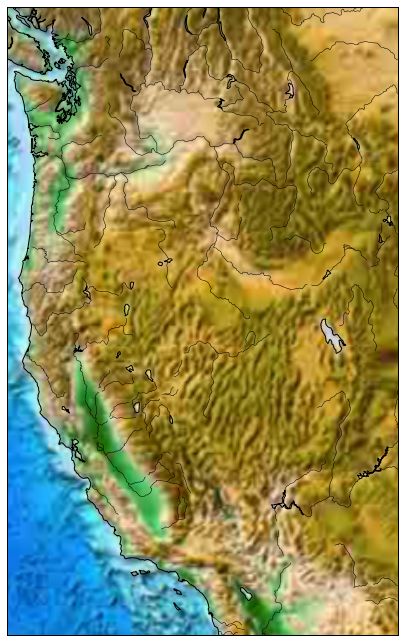

In [8]:
west_coast_bb = [32,50,-125,-110]
plt.figure(figsize=(7,14))
mp = Basemap(projection="merc",
              lat_0=west_coast_bb[0], lon_0=west_coast_bb[2],
              llcrnrlat=west_coast_bb[0],
              llcrnrlon=west_coast_bb[2],
              urcrnrlat=west_coast_bb[1],
              urcrnrlon=west_coast_bb[3],
              resolution='i')
mp.etopo()
mp.drawmapboundary(fill_color='aqua')
mp.drawrivers()
mp.drawcoastlines()

plt.show()

In [4]:
with open("../data/modis.pkl") as fpd:
    modis = cPickle.load(fpd)
print "loaded pandas database with %d points" %len(modis)

loaded pandas database with 31697705 points


216232 west coast fires


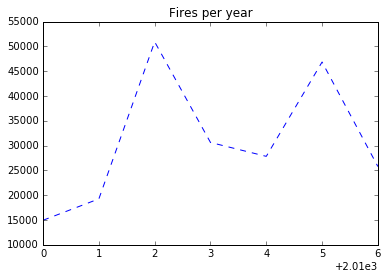

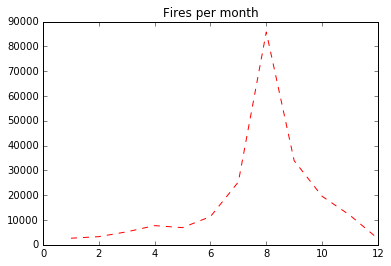

In [12]:
wc_fires = modis[(modis.lat < west_coast_bb[1]) & (modis.lat > west_coast_bb[0]) & 
                 (modis.long > west_coast_bb[2]) & (modis.long < west_coast_bb[3])]
print "%d west coast fires" % len(wc_fires)

n_per_year = []
for year in xrange(2010, 2017):
    n_per_year.append(len(wc_fires[wc_fires.year==year]))
plt.plot(range(2010,2017), n_per_year, 'b--')
plt.title("Fires per year")
plt.show()

n_per_month = []
for month in xrange(1,13):
    n_per_month.append(len(wc_fires[wc_fires.month==month]))
plt.plot(range(1,13), n_per_month, 'r--')
plt.title("Fires per month")
plt.show()

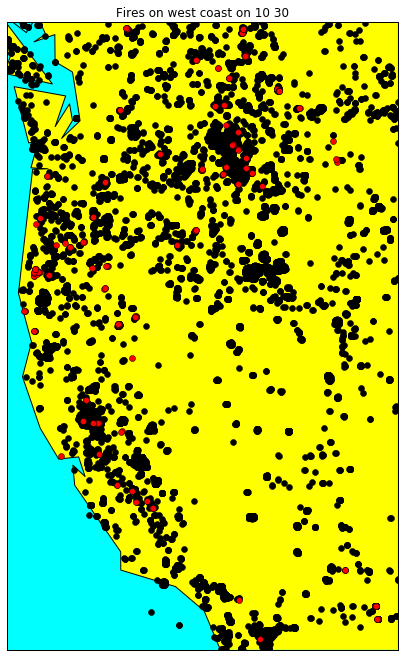

In [14]:
plt.figure(figsize=(7,14))
mp = Basemap(projection="merc",
              lat_0=west_coast_bb[0], lon_0=west_coast_bb[2],
              llcrnrlat=west_coast_bb[0],
              llcrnrlon=west_coast_bb[2],
              urcrnrlat=west_coast_bb[1],
              urcrnrlon=west_coast_bb[3])
month = 5
day = 1
prev_lats = []
prev_longs = []
while month < 11:
    todays_fires = wc_fires[(wc_fires.year == 2013) & (wc_fires.month == month) &
                            (wc_fires.day == day)]
    display.clear_output(wait=True)
    plt.figure(figsize=(7,14))
    mp.drawmapboundary(fill_color='aqua')
    mp.fillcontinents(color='yellow',lake_color='aqua')
    mp.drawcoastlines()
    if len(prev_lats):
        mp.plot(prev_longs, prev_lats, 'ko')
    if len(todays_fires):
        today_longs, today_lats = mp(np.array(todays_fires.long), np.array(todays_fires.lat))
        mp.plot(today_longs, today_lats, 'ro')
        prev_lats += list(today_lats)
        prev_longs += list(today_longs)
    plt.title("Fires on west coast on %d %d" %(month, day))
    plt.show()
    time.sleep(.3)
    day += 1
    if day >= 31 or (day >= 30 and month == 6):
        day = 1
        month += 1